In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

# **First exercise**


---


Let consider the following function in the interval $(0,1)$:
$$
f(x) = -\left|x-\frac{1}{2}\right| + \frac{1}{2}. %\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
Define a function that given the interpolation points, the index of the basis and the evaluation points, return the lagrange basis. Then, plot the basis.

In [2]:
def lagrange_basis(interpolation_points, n_basis, evaluation_points):
    # Initialize the lagrange basis to 1
    l = np.ones((len(evaluation_points)))
    for i in range(len(interpolation_points)):
        if i != n_basis:
            # Standard definition of l_i
            l *= (evaluation_points - interpolation_points[i]) / (interpolation_points[n_basis] - interpolation_points[i])
    return l

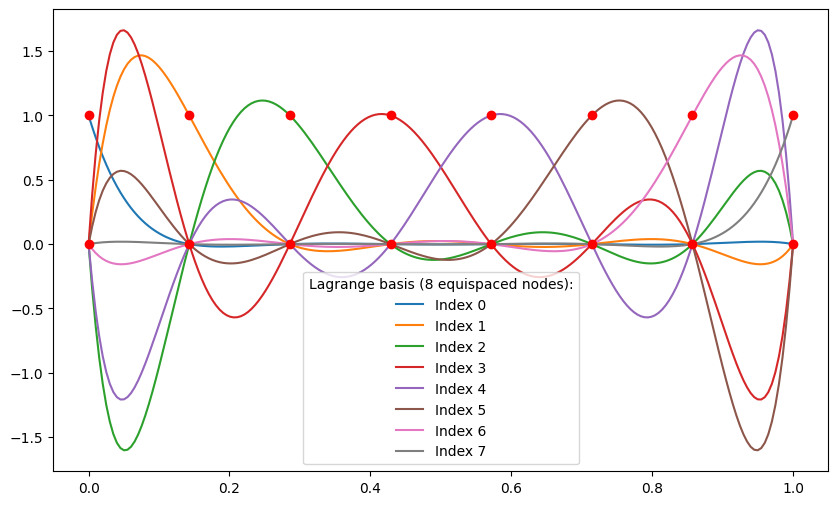

In [3]:
# Plot the basis
n_nodes = 8
interpolation_points = linspace(0, 1, n_nodes)
evaluation_points = linspace(0, 1, 200)
plt.figure(figsize=(10, 6))
for i in range(n_nodes):
    lagrange_basis_i = lagrange_basis(interpolation_points, i, evaluation_points)
    plt.plot(evaluation_points, lagrange_basis_i, label = f'Index {i}')

plt.plot(interpolation_points, interpolation_points*0, 'ro')
plt.plot(interpolation_points, interpolation_points*0 + 1, 'ro')
plt.legend(title = f'Lagrange basis ({n_nodes} equispaced nodes):')
plt.show()

Compute and plot the Lebesgue function using both equispaced and Chebyshev nodes.

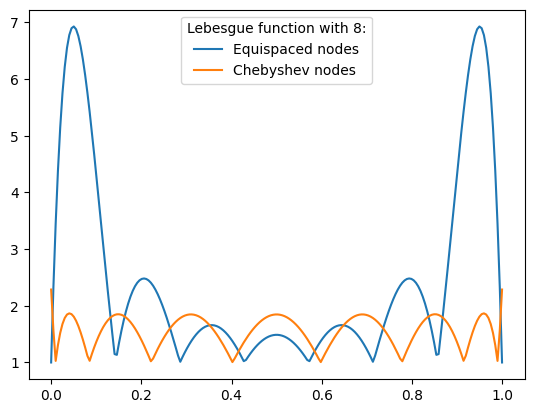

In [4]:
# In these two functions the inputs are the number of nodes n and the interval [a, b]
# If not specified, the interval is [0, 1] (as stated in the exercise)

def equispaced_nodes(n, a=0, b=1):
    return linspace(a, b, n)

def chebyshev_nodes(n, a=0, b=1):
    i = array(range(n))
    x = cos((2*i + 1) * pi/(2*n)) # Chebyshev formula that has the nodes in the interval [-1,1]
    return 0.5*(b + a) + 0.5*(b - a)*x # To have them in [a=0,b=1]

# The following function returns the Lebesgue function evaluated on the points 'evaluation points'
def Lebesgue(interpolation_points, evaluation_points):
    # Create a list for the elements of the Lagrange basis
    basis = []
    for i in range(len(interpolation_points)): # There is a basis element for each node
        basis.append(lagrange_basis(interpolation_points, i, evaluation_points))
    # Take the absolute value of each element of the list and sum them, as in the definition of Lebesgue function
    basis = array([abs(i) for i in basis])
    return basis.sum(axis = 0) # Lebesgue function

# Compute the interpolation points for both equispaced and Chebyshev nodes
interp_points_eq = equispaced_nodes(n_nodes)
interp_points_cheb = chebyshev_nodes(n_nodes)

# Compute the Lebesgue function for them
lebesgue_fun_eq = Lebesgue(interp_points_eq, evaluation_points)
lebesgue_fun_cheb = Lebesgue(interp_points_cheb, evaluation_points)

plt.plot(evaluation_points, lebesgue_fun_eq, label = 'Equispaced nodes')
plt.plot(evaluation_points, lebesgue_fun_cheb, label = 'Chebyshev nodes')
plt.legend(title = f'Lebesgue function with {n_nodes}:')
plt.show()

# From the plot it can be seen that the Lebesgue function associated to equispaced nodes
# grows much more rapidly when getting closer to the extremes of the interval
# compared to the one associated to Chebyshev nodes

Plot the function $f(x)$ and the polynomial interpolation using both equispaced and Chebyshev nodes.

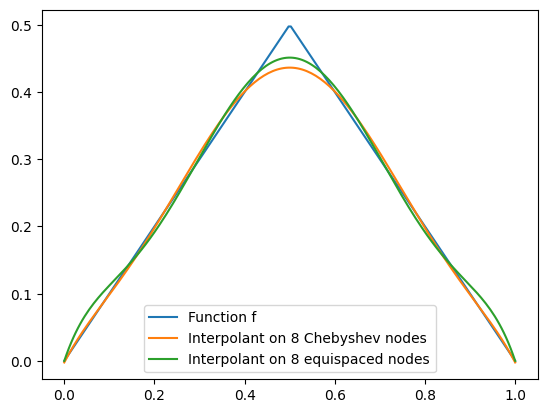

In [5]:
# The following function returns the polynomial interpolation using the Lagrange basis
def poly_interpol(f, interpolation_points, evaluation_points):
    # Values of f on the interpolation points
    f_values = array([f(interpolation_points[i]) for i in range(len(interpolation_points))])
    # Basis elements
    basis = array([lagrange_basis(interpolation_points, i, evaluation_points) for i in range(len(interpolation_points))])
    # Element-wise product and sum over the index i
    return (f_values[:, newaxis] * basis).sum(axis = 0)

def f(x):
    return -abs(x - 1/2) + 1/2

n_nodes = 8
# Create the set of nodes
interp_points_eq = equispaced_nodes(n_nodes)
interp_points_cheb = chebyshev_nodes(n_nodes)
# Create the polynomial interpolations
poly_interpol_cheb = poly_interpol(f, interp_points_cheb, evaluation_points)
poly_interpol_eq = poly_interpol(f, interp_points_eq, evaluation_points)

plt.plot(evaluation_points, f(evaluation_points), label = 'Function f')
plt.plot(evaluation_points, poly_interpol_cheb, label = f'Interpolant on {n_nodes} Chebyshev nodes')
plt.plot(evaluation_points, poly_interpol_eq, label = f'Interpolant on {n_nodes} equispaced nodes')
plt.legend()
plt.show()

# Remember that with higher degree there is Runge's phenomenon!
# It occurs with equispaced nodes because the errors of interpolation accumulate, so
# there is a big oscillation near the boundary of the interval (as observed in the previous plot).
# Chebyshev nodes, being more densely distributed at the boundary, solve this problem.
# Here the phenomenon appears with n_nodes=11

Compute and plot the error between $f(x)$ and the interpolation as the degree of the polynomial increase using both equispaced and Chebyshev nodes.

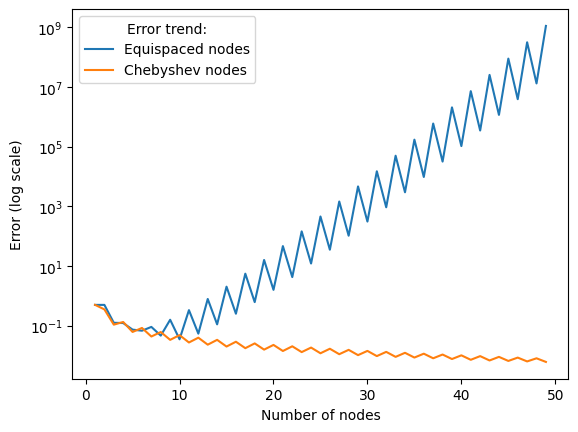

([0.4974874371859297,
  0.4974874371859297,
  0.12499684351405266,
  0.12249690664377166,
  0.07359725475960732,
  0.06781900741429059,
  0.09089271971625845,
  0.0463442469461634,
  0.1578724885471519,
  0.03490977150930891,
  0.33176437409784726,
  0.05407624060040325,
  0.7857079053087754,
  0.11077775990185255,
  2.030123704046379,
  0.25156727987738114,
  5.542273097456391,
  0.6168581024907365,
  15.958662772293271,
  1.5887282142716697,
  46.57071718690175,
  4.255295039257275,
  145.03999463000025,
  12.143837415523667,
  457.91766233668096,
  35.26201076055962,
  1457.4197226262079,
  103.86391226834277,
  4668.974123239816,
  309.59498291984175,
  15037.458405512834,
  932.1089404500342,
  49986.23406584927,
  2969.856274893961,
  172747.08129091485,
  9676.411066402941,
  599692.2983589412,
  31772.628200949286,
  2090087.6298878356,
  105043.04016285106,
  7309993.137277704,
  349406.3785579848,
  25645669.385043837,
  1168598.272502721,
  90221106.08834463,
  3927630.10824

In [6]:
def compute_errors(f, evaluation_points, n, a=0, b=1):
    # Create the lists for the errors, the function will return them
    error_eq = []
    error_cheb = []

    for i in range(1, n):
        # Error using equispaced nodes
        interpolation_points_eq = equispaced_nodes(i, a, b)
        error1 = f(evaluation_points) - poly_interpol(f, interpolation_points_eq, evaluation_points)
        error_norm_eq = max(abs(error1)) # infinity norm
        error_eq.append(error_norm_eq)
        
        # Error using Chebyshev nodes
        interpolation_points_cheb = chebyshev_nodes(i, a, b)
        error2 = f(evaluation_points) - poly_interpol(f, interpolation_points_cheb, evaluation_points)
        error_norm_cheb = max(abs(error2))
        error_cheb.append(error_norm_cheb)

    plt.plot(range(1, n), error_eq, label = 'Equispaced nodes')
    plt.plot(range(1, n), error_cheb, label = 'Chebyshev nodes')
    plt.xlabel('Number of nodes')
    plt.ylabel('Error (log scale)')
    plt.yscale('log') # log is better for plotting
    plt.legend(title = 'Error trend:')
    plt.show()
    return error_eq, error_cheb

n = 50
compute_errors(f, evaluation_points, n)

# As expected due to the fact that f is not sufficiently regular, using interpolation
# with equispaced nodes does not lead to convergence.
# Instead, with Chebyshev nodes the error decreases as the number of nodes increases.

Compute and plot the Lebesgue function as the number of nodes increase using both equispaced and Chebyshev nodes.

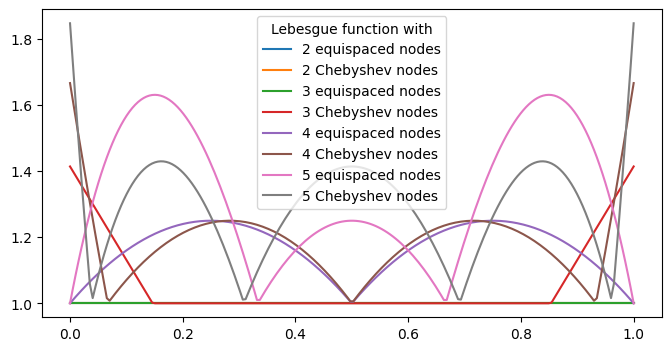

([array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 

In [7]:
def Lebesgue_n(evaluation_points, n, a=0, b=1):
    lebesgue_eq = []
    lebesgue_cheb = []
    plt.figure(figsize=(8, 4))
    for i in range(1, n):
        lebesgue_eq_i = Lebesgue(equispaced_nodes(i, a, b), evaluation_points)
        lebesgue_eq.append(lebesgue_eq_i)
        plt.plot(evaluation_points, lebesgue_eq_i, label = f'{i+1} equispaced nodes')
        lebesgue_cheb_i = Lebesgue(chebyshev_nodes(i, a, b), evaluation_points)
        lebesgue_cheb.append(lebesgue_cheb_i)
        plt.plot(evaluation_points, lebesgue_cheb_i, label = f'{i+1} Chebyshev nodes')

    plt.legend(title = 'Lebesgue function with')
    plt.show()
    return lebesgue_eq, lebesgue_cheb


n = 5
Lebesgue_n(evaluation_points, n)

# **Second exercise**


---

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, 1)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, 1\}.
$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, returns the matrix $A$ and the right hand side $b$.

Let $x_i$ with $i=1,2,...,N-1$ the internal discretization points. Use the following $4^{th}$ order central finite difference approximation for $i = 2,...,N-2$:
$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2},$$
derive (by using the Taylor series expansion/undetermined coefficients method) and use a $4^{th}$ order forward finite difference approximation for $i=1$ and a $4^{th}$ order backward finite difference approximation scheme for $i = N-1$.

In [8]:
def finDif(omega, f, n):
    # Initialize A as (n x n) matrix, to be able to add the conditions u_0 = 0 and u_N = 0
    A = zeros((n, n))
    # Initialize b accordingly
    b = zeros(n)
    x = linspace(omega[0], omega[-1], n)
    h = 1 / (n - 1)
    
    # Right hand side
    b = f(x)
    # u[0] and u[n] are 0 for boundary conditions
    b[0] = 0
    b[-1] = 0

    # In the system we are also considering the two identities
    # A[0, 0] * u_0 = 1 * 0 = 0 and similarly for u_n, so we impose:
    A[0, 0] = 1
    A[-1, -1] = 1

    # For the matrix A a minus sign is used due to the fact that we are actually estimating -u'' and not u''
    # Given formula for -u'' for the internal points
    for i in range(2, n-2):
        A[i, i - 2] = 1
        A[i, i - 1] = -16
        A[i, i] = 30
        A[i, i + 1] = -16
        A[i, i + 2] = 1

    # For the points near the boundary: (see the markdown cell below for the formulas)
    A[1, 1] = -45
    A[1, 2] = 154
    A[1, 3] = -214
    A[1, 4] = 156
    A[1, 5] = -61
    A[1, 6] = 10
    
    A[-2, -2] = -45
    A[-2, -3] = 154
    A[-2, -4] = -214
    A[-2, -5] = 156
    A[-2, -6] = -61
    A[-2, -7] = 10

    A *= 1/(12*h**2)

    return A, b

The formula used above for the points near the boundary, has order $4$ with respect to h.

To find it, we consider a linear combination of the values
$u(x), u(x \pm h), u(x \pm 2h), u(x \pm 3h), u(x \pm 4h), u(x \pm 5h)$, where the plus sign is for the points near the left end of the interval and the minus sign for the ones near the right end. Their computation is analogous, but with opposite sign in the matrix obtained.

First we use Taylor series to develop $u(x+kh)$ for $k = 1,\dots, 5$ up to $k\frac{h^5}{120}u^{(V)}(x) + O(h^6)$. Then multiplying by $\frac{1}{h^2}$, we can write a set of linear equations by imposing the annihilation of the coefficient of the terms multiplied by a power of $h$ smaller than $4$ (except for the one relevant to the second derivative, which needs to be equal to $1$). This leads to the linear system:

$
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 \\
0 & 1 & 2 & 3 & 4 & 5 \\
0 & \frac{1}{2} & 2 & \frac{9}{2} & 8 & \frac{25}{2} \\
0 & \frac{1}{6} & \frac{4}{3} & \frac{9}{2} & \frac{32}{3} & \frac{125}{6} \\
0 & \frac{1}{24} & \frac{2}{3} & \frac{27}{8} & \frac{32}{3} & \frac{625}{24} \\
0 & \frac{1}{120} & \frac{4}{15} & \frac{81}{40} & \frac{128}{15} & \frac{625}{24}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5 \\
x_6
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0
\end{bmatrix}\\
$


which, solved, gives the following formula:

\begin{equation*} u''(x_1) \approx \frac{45u_1-154u_2+214u_3-156u_4+61u_5-10u_6}{12h^2}.
\end{equation*}<br>

As previously said, it is analogous for 

\begin{equation*} u''(x_{N-1}) \approx \frac{45u_{N-1}-154u_{N-2}+214u_{N-3}-156u_{N-4}+61u_{N-5}-10u_{N-6} }{12h^2}
\end{equation*}

Call the function using:

In [9]:
omega = [0,1]
f = lambda x : -abs(x-0.5*np.ones(len(x))) + 0.5*np.ones(len(x))
n = 100
bc = [0,0] # boundary conditions
A, b = finDif(omega, f, n)

Implement a function that computes the LU of the system matrix $A$

In [10]:
def LU(A):
    A = A.copy() # for avoiding modifying the original, since numpy passes objects by reference
    N = len(A)

    for k in range(N-1):
        if (abs(A[k, k]) < 1e-15):
            raise RuntimeError("Null pivot")
        A[k + 1:N, k] /= A[k, k]
        for j in range(k + 1, N):
            A[k + 1:N, j] -= A[k + 1:N, k] * A[k, j]

    L = tril(A) # lower triangular matrix
    [L.__setitem__((i, i), 1.0) for i in range(N)] # diagonal elements must be = 1
    # otherwise the system cannot be solved (it would have n^2 equations but n^2 + n unknowns)

    U = triu(A) # upper triangular matrix

    return L, U


L, U = LU(A)

Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [11]:
def L_solve(L,rhs): # rhs is the right-hand side of the equation (here we solve Ly=b)
    N = len(L)
    y = zeros(N)
    
    for i in range(N): # forward substitutions algorithm
        y[i] = (rhs[i] - dot(L[i, 0:i], y[0:i])) / L[i,i]  # standard formula
    return y

In [12]:
def U_solve(U,rhs): # rhs is the right-hand side of the equation (here we solve Ux=y)
    N = len(U)
    x = zeros(N)

    for i in range(N-1, -1, -1): # backward substitutions algorithm
        x[i] = (rhs[i] - dot(U[i, i+1:N], x[i+1:])) / U[i,i]  # standard formula
    return x

Solve the derived linear system using the implemented functions and plot the computed solution:

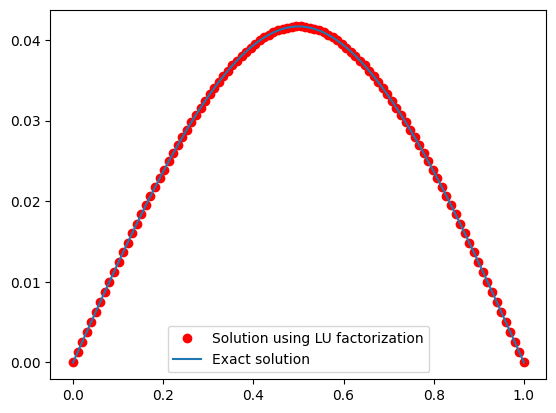

In [13]:
y = L_solve(L,b)
x = U_solve(U,y)

X = linspace(0, 1, n)

plt.plot(X, x, 'ro', label='Solution using LU factorization')
plt.plot(X, linalg.solve(A, b), label='Exact solution')
plt.legend()
plt.show()

Produce a plot and a table where you show the decay of the error vs the number of grid points.
(The exact solution for the above problem can be considered the one obtained from the function 'numpy.linalg.solve' avaliable on numpy)

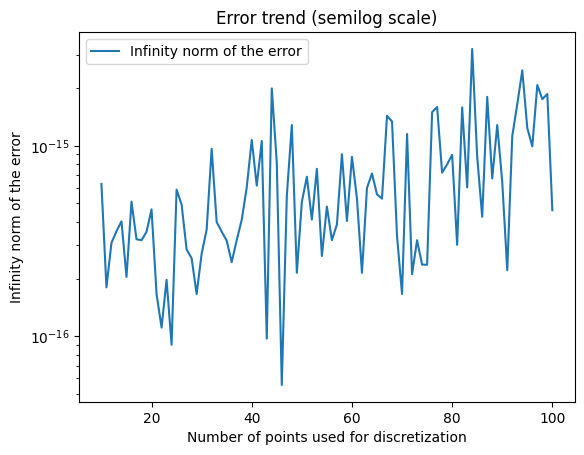

Number of points: 10, Error: 6.29704621779581e-16
Number of points: 11, Error: 1.8041124150158794e-16
Number of points: 12, Error: 3.0878077872387166e-16
Number of points: 13, Error: 3.5561831257524545e-16
Number of points: 14, Error: 4.0072112295064244e-16
Number of points: 15, Error: 2.0469737016526324e-16
Number of points: 16, Error: 5.082739784612045e-16
Number of points: 17, Error: 3.226585665316861e-16
Number of points: 18, Error: 3.191891195797325e-16
Number of points: 19, Error: 3.5301622736128024e-16
Number of points: 20, Error: 4.631711680858075e-16
Number of points: 21, Error: 1.6653345369377348e-16
Number of points: 22, Error: 1.1102230246251565e-16
Number of points: 23, Error: 1.97758476261356e-16
Number of points: 24, Error: 9.020562075079397e-17
Number of points: 25, Error: 5.880712583561376e-16
Number of points: 26, Error: 4.909267437014364e-16
Number of points: 27, Error: 2.8536201179818477e-16
Number of points: 28, Error: 2.5673907444456745e-16
Number of points: 29, E

In [14]:
errors = [] # list of error norms and append to it the norm of the error for each value of n being considered

range_of_n = range(10, 101)
for i in range_of_n:
    A_n, b_n = finDif(omega, f, i)
    L_n, U_n = LU(A_n)
    y_n = L_solve(L_n, b_n)
    x_n = U_solve(U_n, y_n)

    exact_solution_n = linalg.solve(A_n, b_n)

    errors.append(linalg.norm(exact_solution_n - x_n, inf))  # assuming we are using infinity norm

plt.plot(range_of_n, errors, label = 'Infinity norm of the error')
plt.title('Error trend (semilog scale)')
plt.xlabel('Number of points used for discretization')
plt.ylabel('Infinity norm of the error')
plt.yscale('log') # logscale for y
plt.legend()
plt.show()

# Create a dictionary with key the number of points used, value the corresponding error
errors = {f'{n}': errors[n-10] for n in range_of_n}
for n, error in errors.items():
    print(f'Number of points: {n}, Error: {error}')
    
# Note that even though the error does not decay with more points, it's still really small!

Exploit the derived LU factorization to compute the condition number of the system's matrix $A$ using the original problem formulation.

In [15]:
def condNumb(A):
    A_inv = inverse(A) # see next block in which LU factorization is used
    return linalg.norm(A, 2) * linalg.norm(A_inv, 2) # condition number (with 2-norm)

Compute the inverse of the matrix A exploiting the derived LU factorization

In [16]:
def inverse(A):
    N = A.shape[0]
    inverse = zeros((N, N))
    L, U = LU(A)

    for i in range(N):
        ei = zeros(N) # canonical vector
        ei[i] = 1
        # Solve a linear system where the vector of unknowns is the i-th column of the inverse of A
        y = L_solve(L, ei)
        x = U_solve(U, y)
        inverse[:,i] = x

    return inverse

A_inv = inverse(A)

In [17]:
# Now you can compute the condition number
condition_number = condNumb(A)
print(f'The condition number of A is {condition_number}.')
# Check if it is the same of numpy
print(f'According to numpy, the condition number of A is {linalg.cond(A)}.')

The condition number of A is 27040.109056118115.
According to numpy, the condition number of A is 27040.109056124245.


Implement a preconditioned Gradient method to solve the original linear system of equations using an iterative method and plot the solution.

The number of iterations is  28755
The norm of the residual is  9.996140157605755e-06


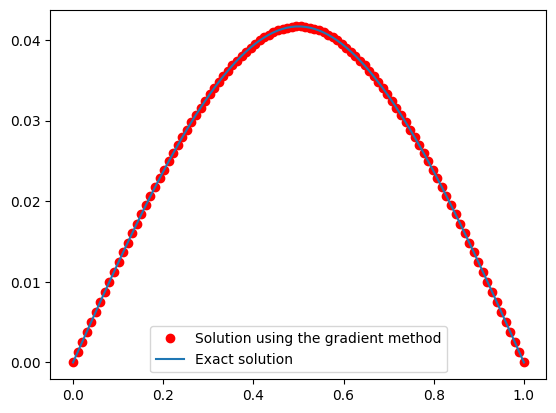

In [18]:
def gradient(A, b, P, nmax=len(A), eps=1e-10):
    N = len(A)
    x = zeros(N)
    tolerance = eps + 1
    residual = b - A@x
    counter = 0

    while counter < nmax and tolerance > eps:
        z = linalg.solve(P, residual) # preconditioned residual
        alpha = (z @residual) / (z @(A @ z))
        x += alpha*z
        residual -= alpha*(A@z)
        counter += 1
        tolerance = linalg.norm(b-A@x, 2)

    print('The number of iterations is ', counter)
    print('The norm of the residual is ', tolerance)
    return x

solution_gradient = gradient(A, b, P = identity(len(A)), nmax = 30000, eps = 1e-5)

plt.plot(X, solution_gradient, 'ro', label =  'Solution using the gradient method')
plt.plot(X, linalg.solve(A, b), label = 'Exact solution')
plt.legend()
plt.show()

# **Third exercise**


---

Consider the following time dependent variation of the PDE starting from the original problem formulation:
$$
u'(t)-k(x)u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $u(t=0)=0$, $k(x) = x$, $\alpha(t) = \cos^2(t)$ and $T = 4\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method for the first time step and a backward differencing formula of second order for the others time steps.

Plot the time dependent solution at $x = 1/3$, $x = 1/2$, $x=1$.


## **Proposed solution**
The semi-discrete formulation can be written using $D_n$ finite difference operator for the discretization of $u''(x_n)$ (that depends on $n$ because we consider the second and the last but one steps in a separate way):

\begin{equation*}
u'(t) -k(x_n)D_n(u_n) = \alpha(t)f(x_n),
\end{equation*}

The first time step - where $i$ is the time step - is:

\begin{equation*}
\frac{u_n^{i} -u^{i-1}_n}{\Delta t} - k_nD_n(u_n^{i-1}) = \alpha(t_{i-1})f(x_n),
\end{equation*}<br>

For $n=1$ it becomes
\begin{equation*}
\frac{u_1^{i} -u^{i-1}_1}{\Delta t} + k_1\frac{-45u_1^{i-1}+154u_2^{i-1}-214u_3^{i-1}+156u_4^{i-1}-61u_5^{i-1}+10u_6^{i-1}}{12h^2}= \alpha^{i-1}f_1,\\
\end{equation*}<br>

And analogously for $n=N-1$ but with $u_{N-1}^{i-1}, u_{N-2}^{i-1}, \ldots , u_{N-6}^{i-1}$ instead of $u_1^{i-1}, u_2^{i-1}, \ldots , u_6^{i-1}$.

For all the other values, the scheme is the following:
\begin{equation*}
\frac{u_{n}^{i} -u^{i-1}_{n}}{\Delta t}+k_{n}\frac{u_{n-2}^{i-1}-16u_{n-1}^{i-1}+30u_n-16u_{n+1}^{i-1}+u_{n+2}^{i-1}}{12h^2}= \alpha^{i-1}f_{n}.
\end{equation*}

Since the forward method used for the first time step is explicit, no solution of linear systems is required. On the contrary, the backward method is implicit, so in the other time steps it can be written as:

\begin{equation*}
\frac{3u_n^{i} - 4u_n^{i-1} + u_n^{i-2}}{2\Delta t} - k_nD_n(u_n^{i}) = \alpha^{i} f_n
\end{equation*}

where $D_n(u_n^{i})$ is as previously seen. This can be rewritten as:

\begin{equation*}
u_n^{i}  - \frac{2\Delta t}{3}k_nD_n(u^i)=\frac{1}{3}( 2\Delta t\alpha^{i} f_n + 4u_n^{i-1} - u_n^{i-2})
\end{equation*}<br>
which is a linear system of equations, thus we can solve it using direct methods, like the $LU$ factorization.

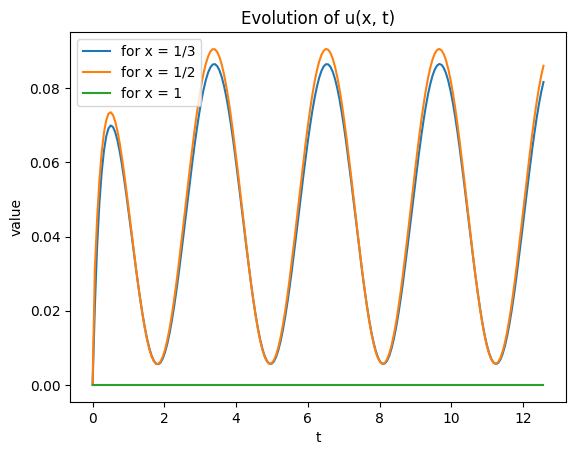

In [19]:
def alpha(t):
    return (np.cos(t))**2

def kappa(x):
    return x

def solve(omega, T, f, n_space, n_time, alpha=alpha, kappa=kappa):
    spaces = linspace(omega[0], omega[1], n_space)
    times = linspace(0, T, n_time)
    dt = T / (n_time - 1)
    u = np.zeros((n_space, n_time))

    for t in range(1, n_time): # 0 is not included because u(t=0) = 0
        A, b = finDif(omega, f, n_space) # start considering the discretization of -u''

        if t == 1: # Forward Euler
            u[1, 1] = u[1, 0] + dt * (-kappa(spaces[1]) * (A[1, 1:7] @ u[1:7, 0]) + alpha(times[0]) * (f(spaces)[1]))
           
            for n in range(2, n_space-1):
                u[n, t] = u[n, t-1] + dt * (-kappa(spaces[n]) * (A[n, n-2:n+3] @ u[n-2:n+3, 0]) + alpha(times[0]) * (f(spaces)[n]))

            u[-2, 1] = u[-2, 0] + dt * (-kappa(spaces[-2]) * (A[-2, -7:-1] @ u[-7:-1, 0]) + alpha(times[0]) * (f(spaces)[-2]))

        else: # Backward differentiation formula of order 2
            # Update the matrix A and the right hand side b to solve a linear system
            for n in range(1, n_space - 1):
                A[n, :] *= kappa(spaces[n]) * 2 / 3 * dt
                A[n, n] += 1
                b[n] *= dt * 2 * alpha(times[t])
                b[n] += 4 * u[n, t-1] - u[n, t-2]
                b[n] /= 3

            L, U = LU(A) # solve the system at each time iteration
            y = L_solve(L, b)
            x = U_solve(U, y)
            u[:, t] = x

    return u


n = 100
T = 4 * np.pi
number_of_times = 200
u = solve(omega, T, f, n, number_of_times)
time_coords = linspace(0, T, number_of_times)

plt.plot(time_coords, u[n//3, :], label='for x = 1/3')
plt.plot(time_coords, u[n//2, :], label='for x = 1/2')
plt.plot(time_coords, u[-1, :], label='for x = 1')
plt.title('Evolution of u(x, t)')
plt.xlabel('t')
plt.ylabel('value')
plt.legend()
plt.show()

# Assuming the boundary conditions are homogeneous (like before),
# u(1, t) = 0 as we can see in the plot